## 데이터 불러오기

In [ ]:
import pandas as pd
df=pd.read_csv('auto.csv')
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

## Categorical 변수 바꾸기

In [ ]:
df = pd.read_csv('auto.csv')
df = pd.get_dummies(df,columns=['origin'],prefix='origin')
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


## Input/Output 나누기

In [ ]:
import numpy as np
y = np.array(df.pop('mpg'))
X = np.array(df)

## 데이터정규화

In [ ]:
X_std = (X-X.mean())/X.std()

## 회귀모형 만들기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X.shape

(392, 9)

In [ ]:
model = keras.Sequential([
                          layers.Dense(16, activation='relu', input_shape = [X.shape[1]]),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1)
])

optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [ ]:
hist=model.fit(X_std,y,epochs=1000,validation_split=0.2)

In [ ]:
history=hist.history

## 그래프로 확인해보기

In [ ]:
history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

(0.0, 200.0)

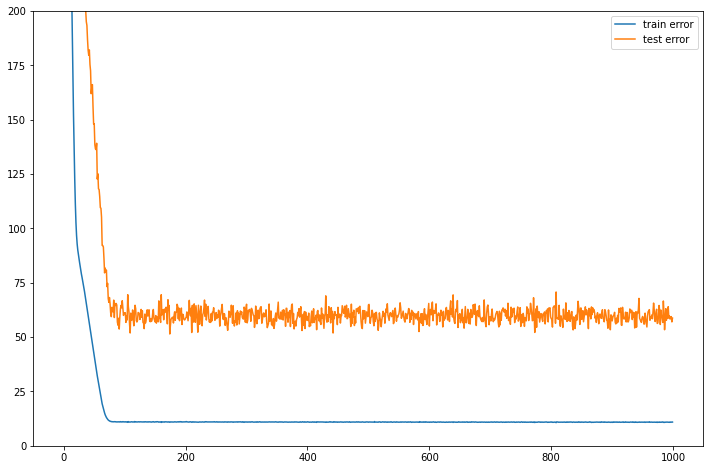

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(history['loss'],label='train error')
plt.plot(history['val_loss'], label='test error')
plt.legend()
plt.ylim([0,200])

(0.0, 200.0)

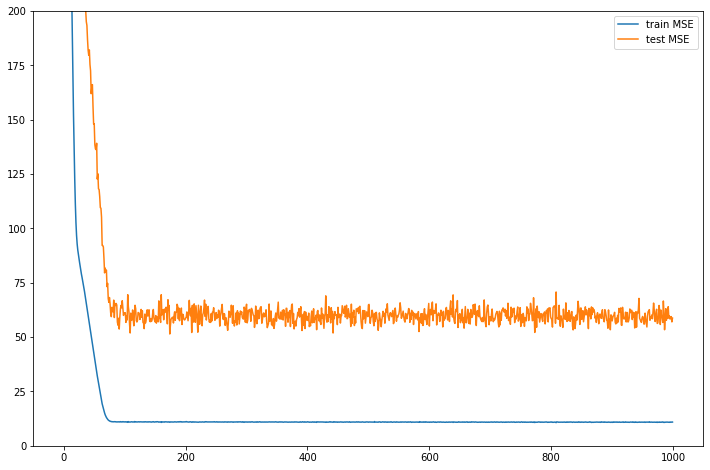

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history['mse'],label='train MSE')
plt.plot(history['val_mse'], label='test MSE')
plt.legend()
plt.ylim([0,200])

## 과제: 딥러닝 아키텍처를 바꾸어 정확도를 개선해보시오